##Importing the required libraries


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)

import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import nltk
nltk.download('all')

##Uploading the .csv files

In [ ]:
filenames_list = []
for i in range(14):
  if i<9:
    name = f"/content/Jan0{i+1}.csv"
  else:
    name = f"/content/Jan{i+1}.csv"
  filenames_list.append(name)
print(filenames_list)

['/content/Jan01.csv', '/content/Jan02.csv', '/content/Jan03.csv', '/content/Jan04.csv', '/content/Jan05.csv', '/content/Jan06.csv', '/content/Jan07.csv', '/content/Jan08.csv', '/content/Jan09.csv', '/content/Jan10.csv', '/content/Jan11.csv', '/content/Jan12.csv', '/content/Jan13.csv', '/content/Jan14.csv']


In [ ]:
data = []
for i in range(10):
  name = f"df{i+1}"
  df = pd.read_csv(filenames_list[i])
  data.append(df)


In [ ]:
df = pd.concat(data)
df

,Unnamed: 0,Clean Text
0,0,"['decisive glorious', 'land king', 'chala', 'c..."
1,1,"['born queen', 'take', 'south india', 'oak', '..."
2,2,"['indigo', 'server hacked', 'december', 'inter..."
3,3,"['sony', 'launch', 'playstation india', 'febru..."
4,4,"['apple', 'remove', 'game apps', 'china store'..."
...,...,...
299,299,"['apple', 'hyundai', 'agree', 'electric car', ..."
300,300,"['trader', 'body', 'seek', 'ban', 'whatsapp', ..."
301,301,"['mart', 'parent', 'net', 'rise', 'crore', 'fe..."
302,302,"['december', 'fuel demand', 'rise', 'month hig..."


In [ ]:
df = df.rename({'Clean Text': 'Text'}, axis='columns')
df.drop(columns="Unnamed: 0", inplace=True)

##Extracting text from the data frame and appending to a list

In [ ]:
text_list = []
for i in range(len(df)):
  text_list.append(df['Text'].values[i])
text_list

["['decisive glorious', 'land king', 'chala', 'cape cod', 'work', 'decisive glorious', 'land king', 'chala', 'cape cod', 'worked', 'horse', 'exercised', 'friday', 'january', 'fashion', 'star', 'app', 'sovereign', 'power', 'app', 'easy', 'romantic', 'bay', 'baskar', 'empress', 'andromeda', 'sky', 'app', 'finished', 'tifosi', 'maintains', 'form', 'silverman', 'ayaz', 'khan', 'hadar', 'alam', 'moved', 'better', 'finished', 'merrywin', 'cape cod', 'murugan', 'impressed', 'naomi', 'azad', 'alam', 'green', 'channel', 'app', 'kingoftheworld', 'murugan', 'fully', 'eased', 'glorious land', 'alam', 'fine', 'nick', 'king chala', 'azfar syeed', 'moved', 'amendment', 'annexed', 'iltaf', 'hussain', 'moved', 'freely', 'knight', 'envied', 'emelda', 'good', 'shape', 'decisive', 'shahar', 'babu', 'pleased', 'wild', 'passion', 'app', 'optimus', 'commander', 'janardhan', 'maidstone', 'kamigallu', 'supreme', 'excelsior', 'battista', 'rajendra', 'singh', 'moved', 'bit', 'exquisite', 'star', 'prince', 'winds

In [ ]:
flat_list = []
flat_list1 = []
for i in text_list:
  for j in i:
    flat_list1.append(j)
flat_list = "".join(flat_list1)
flat_list

##Data Cleansing for the entire corpus of text

In [ ]:
for m in range(len(df)):
  
  #Removing all non-letters and non-digits
  df['Text'].values[m] = (re.sub(r"\W", " ", df['Text'].values[m]))
  

  #Removing all extra white spaces
  df['Text'].values[m] = " ".join(df['Text'].values[m].split())


In [ ]:
df['Text']

0      decisive glorious land king chala cape cod wor...
1      born queen take south india oak style rewardin...
2      indigo server hacked december internal documen...
3      sony launch playstation india february pre ord...
4      apple remove game apps china store meet deadli...
                             ...                        
299    apple hyundai agree electric car tie early yea...
300    trader body seek ban whatsapp facebook new pri...
301    mart parent net rise crore festive sale pushed...
302    december fuel demand rise month high diesel sa...
303    gold regains sheen dec expectation fresh stimu...
Name: Text, Length: 3484, dtype: object

In [ ]:
# Function to perform Tokenizing 
def tokenizing(Text):
  split = re.split('\W+', Text)
  return split

In [ ]:
df['Text']=df['Text'].apply(lambda x: tokenizing(x.lower()))

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

645891

##Frequency distribution Graph for the most frequently occuring words 

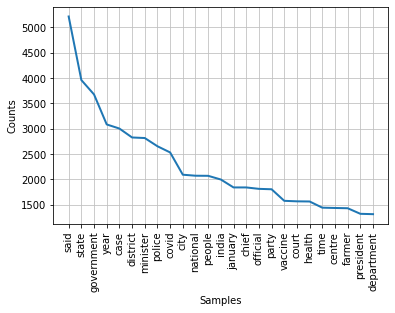

In [ ]:
import nltk
#from nltk.corpus import webtext
from nltk.probability import FreqDist


data_analysis = nltk.FreqDist(text_list)
  
  # Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
  
  #for key in sorted(filter_words):
  #    print("%s: %s" % (key, filter_words[key]))
  
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(25, cumulative=False)

In [ ]:
#We see words like 'said', 'city', etc. which would not add much value to the model.

In [ ]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))
for m in range(len(df)):
 df['Text'].values[m] = listToString(df['Text'].values[m])
df

,Text
0,decisive glorious land king chala cape cod wor...
1,born queen take south india oak style rewardin...
2,indigo server hacked december internal documen...
3,sony launch playstation india february pre ord...
4,apple remove game apps china store meet deadli...
...,...
299,apple hyundai agree electric car tie early yea...
300,trader body seek ban whatsapp facebook new pri...
301,mart parent net rise crore festive sale pushed...
302,december fuel demand rise month high diesel sa...


##Removal of Stopwords and those obtained from the Frequency Distribution Graph

In [ ]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"the", "jul", "pm", "https", "www", "printable", "version", "thehindu", "com", "news", "ece", 
               "s", "t", "d", "m", "article", "b", "rb","cwe", "click", "subscribe", "photo", "credit", "said", "topvpn",
               "right", "caused", "said", "people", "city", "official", "said"}
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
for m in range(len(df)):
  text =df['Text'].values[m]
    #"nlp" Object is used to create documents with linguistic annotations.
  my_doc = nlp(text)

  # Create list of word tokens
  token_list = []
  for token in my_doc:
    token_list.append(token.text)

  # Create list of word tokens after removing stopwords
  filtered_sentence =[] 

  for word in token_list:
   lexeme = nlp.vocab[word]
   if lexeme.is_stop == False:
        filtered_sentence.append(word) 
  r = filtered_sentence
  df['Text'].values[m] = r

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

630428

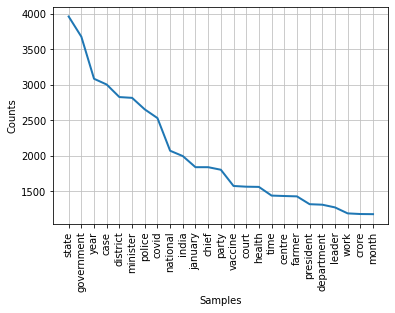

In [ ]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist


data_analysis = nltk.FreqDist(text_list)
  
  # Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
  
  #for key in sorted(filter_words):
  #    print("%s: %s" % (key, filter_words[key]))
  
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(25, cumulative=False)

##Removal of words less than 3 letters long

In [ ]:
for j in range(len(df)):
  add_list = []
  for i in df['Text'].values[j]:
    if len(i)>2:
      add_list.append(i)
  df['Text'].values[j] = add_list

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

629828

##Lemmatiztion

In [ ]:
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()

for m in range(len(df)):
  temp1 = []
  temp2 = df['Text'].values[m]
  for i in temp2:
    temp1.append(lemmatizer.lemmatize(i))
  df['Text'].values[m] = temp1 
df.head(len(df))

,Text
0,"[decisive, glorious, land, king, chala, cape, ..."
1,"[born, queen, south, india, oak, style, reward..."
2,"[indigo, server, hacked, december, internal, d..."
3,"[sony, launch, playstation, india, february, p..."
4,"[apple, remove, game, apps, china, store, meet..."
...,...
299,"[apple, hyundai, agree, electric, car, tie, ea..."
300,"[trader, body, seek, ban, whatsapp, facebook, ..."
301,"[mart, parent, net, rise, crore, festive, sale..."
302,"[december, fuel, demand, rise, month, high, di..."


##Bigram Formation

In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

#Appending all text lists into a single list-of-lists
sentence_stream = []
for i in range(len(df)):
  sentence_stream.append(df['Text'].values[i])

#Creating a bigram model
bigram = Phrases(sentence_stream, min_count=2, threshold=5, delimiter=b' ')

#Training the model
bigram_phraser = Phraser(bigram)

#Applying the model in each corpus
tokens= []
for x in sentence_stream:
  tokens.append(bigram_phraser[x])

In [ ]:
for i in range(10):
  print(tokens[i])

['decisive glorious', 'land king', 'chala', 'cape cod', 'work', 'decisive glorious', 'land king', 'chala', 'cape cod', 'worked', 'horse exercised', 'friday', 'january', 'fashion', 'star', 'app', 'sovereign power', 'app', 'easy', 'romantic', 'bay', 'baskar', 'empress', 'andromeda', 'sky', 'app', 'finished', 'tifosi', 'maintains', 'form', 'silverman', 'ayaz khan', 'hadar', 'alam', 'moved better', 'finished', 'merrywin', 'cape cod', 'murugan', 'impressed', 'naomi', 'azad', 'alam', 'green', 'channel', 'app', 'kingoftheworld', 'murugan', 'fully', 'eased', 'glorious land', 'alam', 'fine nick', 'king chala', 'azfar syeed', 'moved', 'amendment', 'annexed', 'iltaf hussain', 'moved freely', 'knight', 'envied', 'emelda', 'good shape', 'decisive', 'shahar babu', 'pleased', 'wild', 'passion', 'app', 'optimus commander', 'janardhan', 'maidstone kamigallu', 'supreme excelsior', 'battista', 'rajendra singh', 'moved', 'bit', 'exquisite', 'star', 'prince', 'windsor', 'app', 'easily', 'finished length', 

In [ ]:
#Updating the Clean Text values in the Data Frame

for i in range(len(df)):
  df['Text'].values[i] = tokens[i]

In [ ]:
df.head(len(df))

,Text
0,"[decisive glorious, land king, chala, cape cod..."
1,"[born queen, south india, oak, style, rewardin..."
2,"[indigo server, hacked, december, internal doc..."
3,"[sony, launch, playstation india, february, pr..."
4,"[apple, remove, game apps, china store, meet, ..."
...,...
299,"[apple, hyundai, agree, electric car, tie, ear..."
300,"[trader, body, seek, ban, whatsapp facebook, n..."
301,"[mart, parent, net, rise, crore, festive, sale..."
302,"[december, fuel demand, rise, month, high dies..."


In [ ]:
data_lemmatized=df["Text"].tolist()
data_lemmatized

##Finding the Optimal Number of Topics for the LDA Model

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=2, 
                                                        limit=50, 
                                                        step=1)

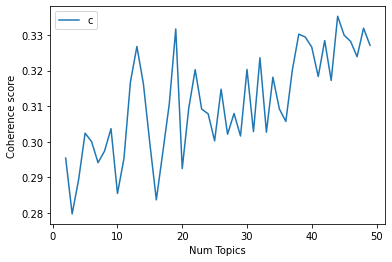

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2954
Num Topics = 3  has Coherence Value of 0.2797
Num Topics = 4  has Coherence Value of 0.2893
Num Topics = 5  has Coherence Value of 0.3024
Num Topics = 6  has Coherence Value of 0.3
Num Topics = 7  has Coherence Value of 0.2941
Num Topics = 8  has Coherence Value of 0.2974
Num Topics = 9  has Coherence Value of 0.3037
Num Topics = 10  has Coherence Value of 0.2854
Num Topics = 11  has Coherence Value of 0.2953
Num Topics = 12  has Coherence Value of 0.3168
Num Topics = 13  has Coherence Value of 0.3268
Num Topics = 14  has Coherence Value of 0.3163
Num Topics = 15  has Coherence Value of 0.2995
Num Topics = 16  has Coherence Value of 0.2836
Num Topics = 17  has Coherence Value of 0.297
Num Topics = 18  has Coherence Value of 0.3106
Num Topics = 19  has Coherence Value of 0.3317
Num Topics = 20  has Coherence Value of 0.2924
Num Topics = 21  has Coherence Value of 0.3093
Num Topics = 22  has Coherence Value of 0.3203
Num Topics = 23  has Cohe

##Building the LDA Model

In [ ]:
# Build LDA model
from gensim.models import CoherenceModel
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                            num_topics=42, 
                                            id2word=id2word,
                                            alpha = 0.5, 
                                            eta = 1.6, 
                                            passes=10, 
                                            workers=2, 
                                            random_state=10, 
                                            chunksize = 1600,
                                            per_word_topics = True
                                            )
#pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]
# Viewing the topics formed
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.000*"solarwinds hacker" + 0.000*"email breached" + 0.000*"bonanza foreign" + 0.000*"inboxes nation" + 0.000*"premier law" + 0.000*"provide intelligence" + 0.000*"winning access" + 0.000*"enforcement organization" + 0.000*"thousand email" + 0.000*"justice department"
Topic: 1 
Words: 0.000*"neyveli" + 0.000*"curio" + 0.000*"rural artisan" + 0.000*"showcasing skill" + 0.000*"craft poompuhar" + 0.000*"expo" + 0.000*"ponsetto" + 0.000*"bronze" + 0.000*"mache" + 0.000*"perfumery"
Topic: 2 
Words: 0.000*"devotee" + 0.000*"temple" + 0.000*"book" + 0.000*"vijaya sai" + 0.000*"reading" + 0.000*"darshan" + 0.000*"listening" + 0.000*"trust" + 0.000*"donation" + 0.000*"tdp leader"
Topic: 3 
Words: 0.000*"normal rainfall" + 0.000*"excess rainfall" + 0.000*"post monsoon" + 0.000*"recorded rainfall" + 0.000*"space" + 0.000*"flight surgeon" + 0.000*"coastal karnataka" + 0.000*"state" + 0.000*"rainfall normal" + 0.000*"received rainfall"
Topic: 4 
Words: 0.000*"taiwan" + 0.000*"counc

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.240778679793111

Coherence Score:  0.5087518015342322


##Visualization using Word Clouds and Inter Topic Distance Map

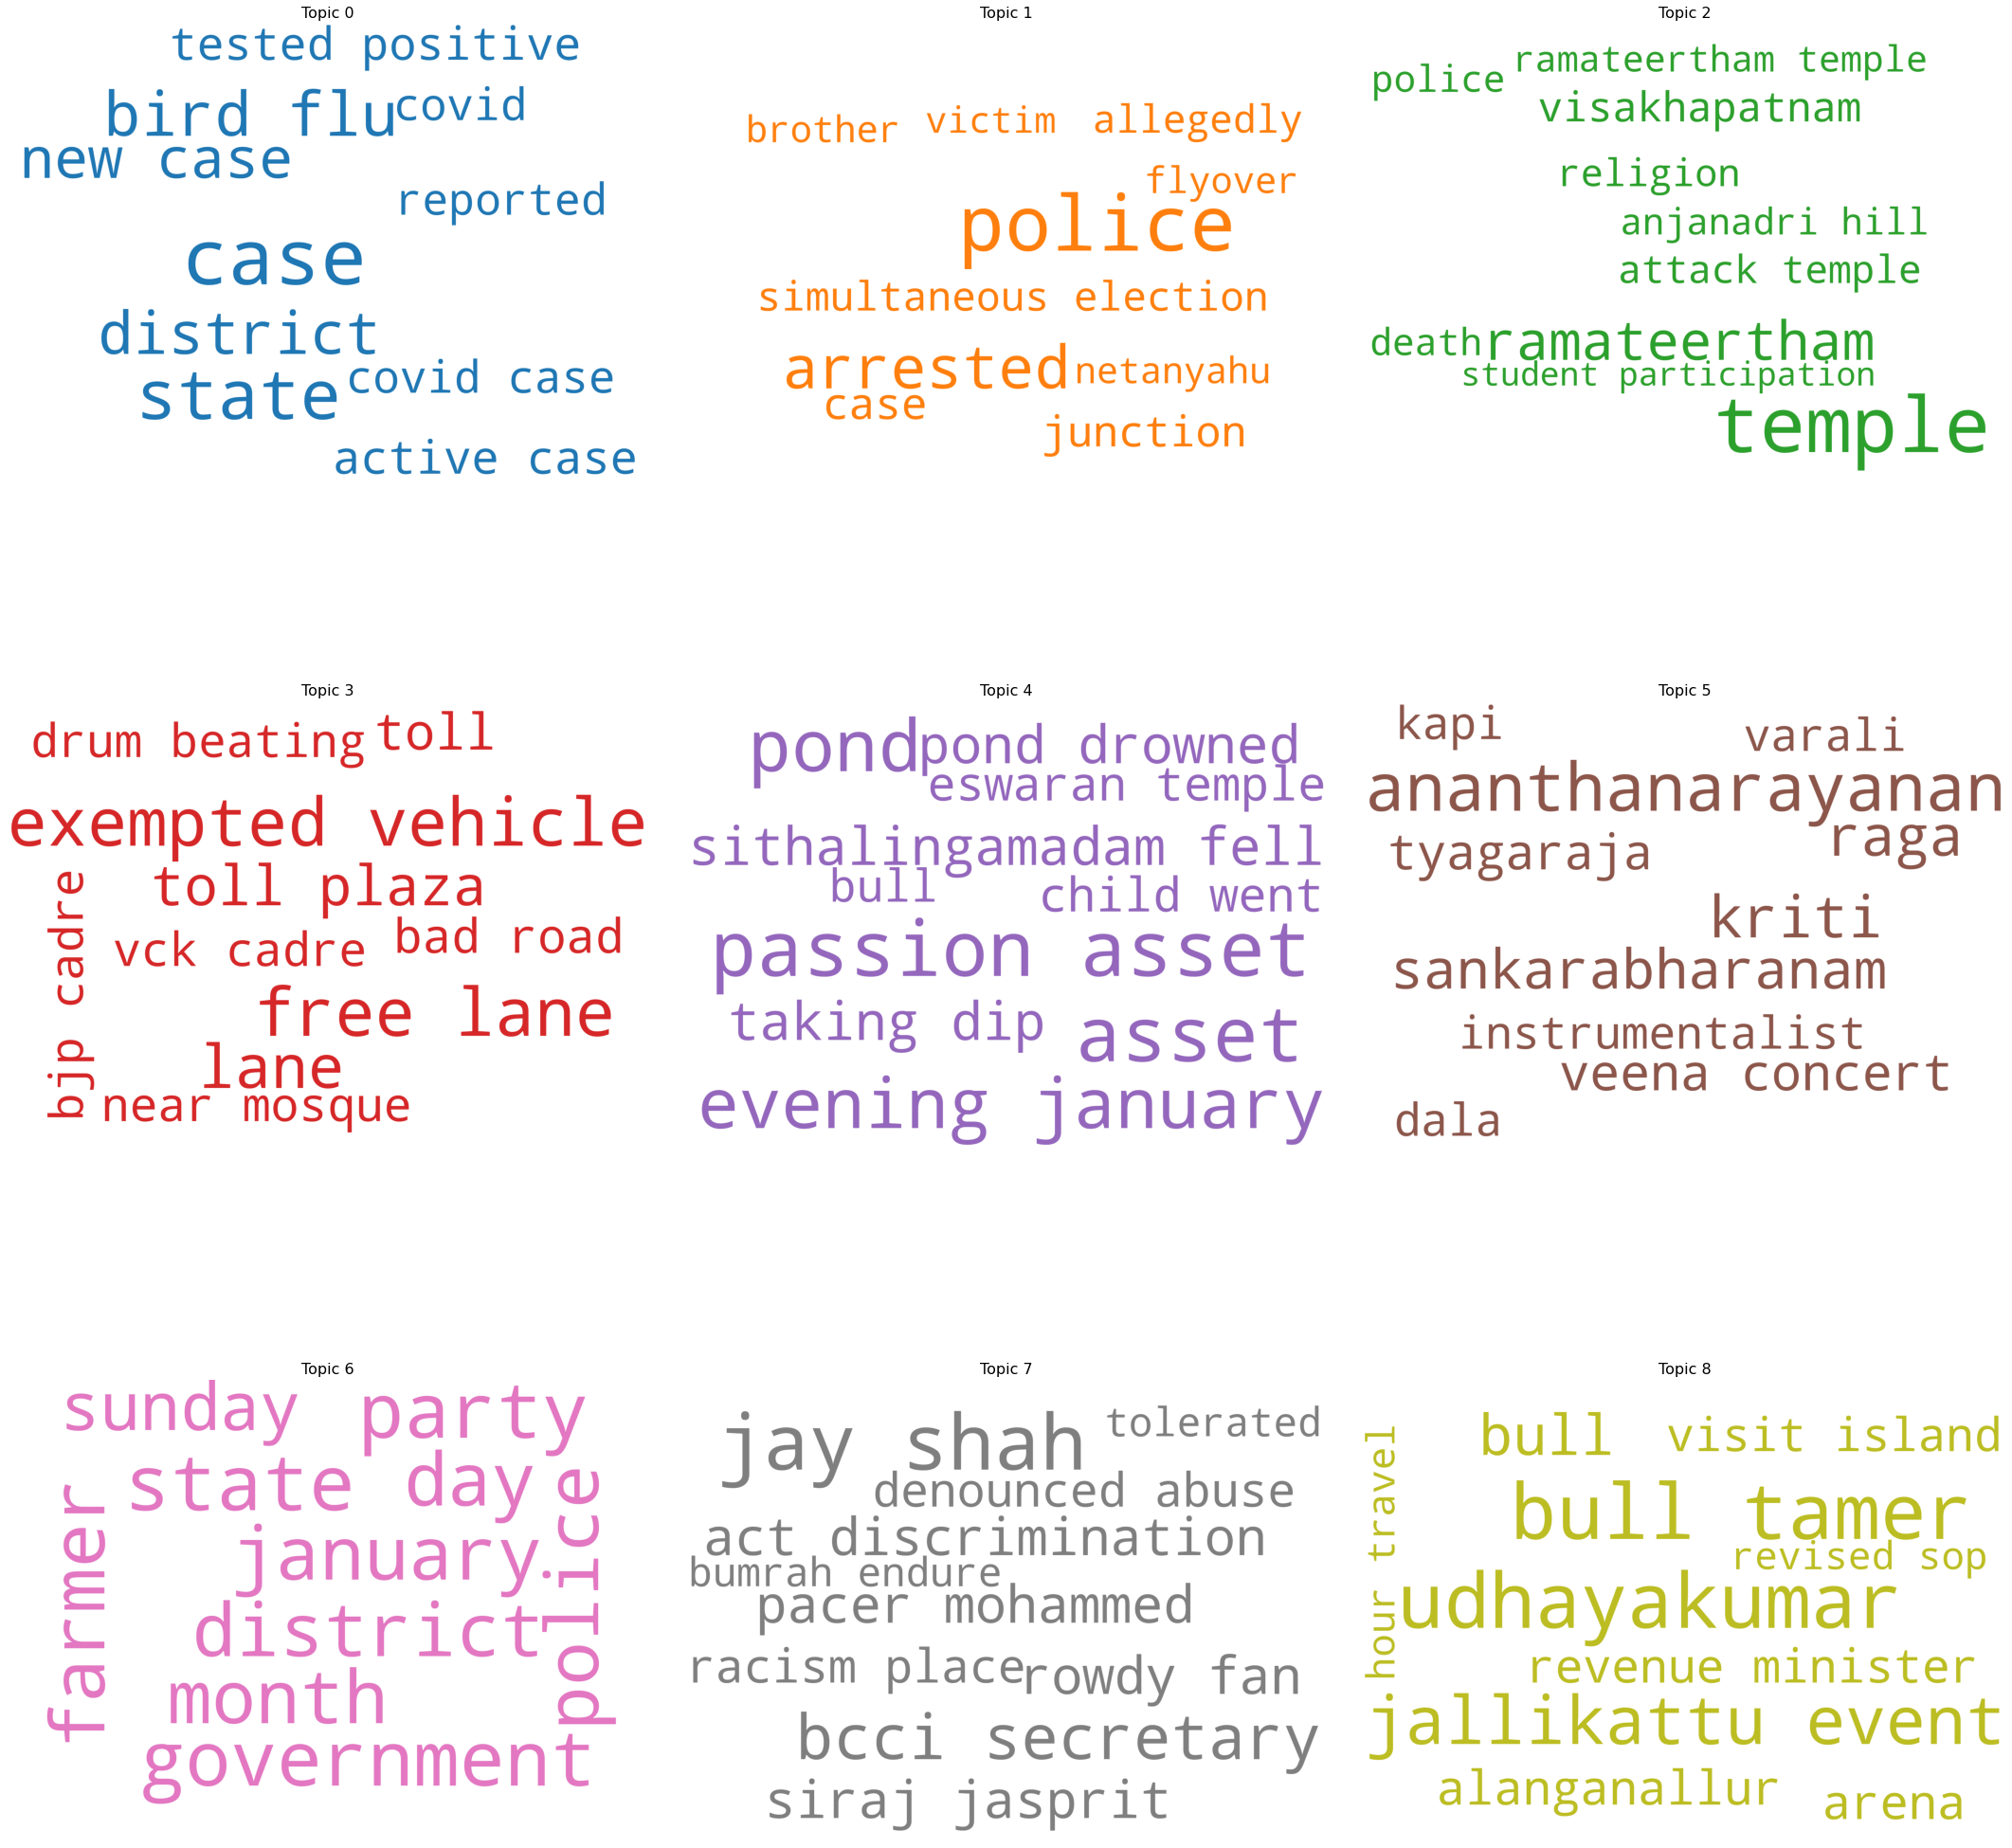

In [ ]:
#Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# Assigning different colors to each word cloud
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

# Drawing the word cloud 
Word_cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  contour_color='steelblue',
                  color_func=lambda *args, **kwargs: cols[i])

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    Word_cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(Word_cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=30, hspace=30)
plt.axis('off')
plt.margins(x=20, y=20)
plt.tight_layout()
plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.187702 -0.004064       1        1  69.102750
27     0.026390  0.038584       2        1   6.620374
18     0.002992 -0.017942       3        1   2.526823
41     0.012433 -0.007596       4        1   2.313073
13     0.006090 -0.009813       5        1   1.700924
19    -0.002757 -0.001284       6        1   0.915159
38    -0.001210 -0.002004       7        1   0.887487
31    -0.001509 -0.002825       8        1   0.784577
39    -0.007721 -0.000201       9        1   0.765732
10    -0.003442 -0.001576      10        1   0.668913
8     -0.006961 -0.000090      11        1   0.614871
3     -0.007267 -0.000873      12        1   0.558835
34    -0.006142 -0.001040      13        1   0.552122
16    -0.008343  0.000016      14        1   0.550183
20    -0.005666 -0.000955      15        1   0.528928
22    -0.004928  0.000195      16        1   0.501555
6     -0.005925 -0.000496      17        1   0.488859
5     -0.006230  0.000281      18        1   0.464002
2     -0.005816 -0.000336      19        1   0.462440
25    -0.006998  0.000679      20        1   0.449706
35    -0.006894  0.000484      21        1   0.443990
26    -0.006733  0.000155      22        1   0.427283
17    -0.006564  0.000132      23        1   0.417160
33    -0.007113  0.000471      24        1   0.414406
28    -0.006778 -0.000199      25        1   0.402350
32    -0.006748  0.000321      26        1   0.400247
36    -0.007009  0.000514      27        1   0.400130
9     -0.006785  0.000146      28        1   0.398704
12    -0.007047  0.000337      29        1   0.395674
4     -0.006695  0.000758      30        1   0.386998
30    -0.007322  0.000741      31        1   0.384810
24    -0.006949  0.000313      32        1   0.384766
14    -0.007128  0.000699      33        1   0.383945
37    -0.007189  0.000758      34        1   0.383115
15    -0.007129  0.000384      35        1   0.381518
0     -0.007267  0.000755      36        1   0.367181
1     -0.007235  0.000740      37        1   0.363940
23    -0.007204  0.000756      38        1   0.361303
40    -0.007115  0.000711      39        1   0.361299
11    -0.007246  0.000854      40        1   0.361296
21    -0.007293  0.000759      41        1   0.361287
29    -0.007249  0.000752      42        1   0.361286, topic_info=          Term         Freq        Total Category  logprob  loglift
3568    police   778.000000   778.000000  Default  30.0000  30.0000
763       case   794.000000   794.000000  Default  29.0000  29.0000
1216     party   440.000000   440.000000  Default  28.0000  28.0000
208      state  1750.000000  1750.000000  Default  27.0000  27.0000
3465  district  1010.000000  1010.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
79        work     0.031851   546.109737  Topic42 -10.9524  -4.1263
797       need     0.031844   393.709364  Topic42 -10.9527  -3.7993
619      month     0.031817   584.650287  Topic42 -10.9535  -4.1955
467     called     0.031813   190.399802  Topic42 -10.9536  -3.0737
718        new     0.031769   670.208260  Topic42 -10.9550  -4.3336

[2298 rows x 6 columns], token_table=       Topic      Freq                    Term
term                                          
49101      1  0.276077                    aagi
49628      1  0.281145  abbreviationdefinition
59062      1  0.405755                abhiyaan
60013      1  0.262796         abolish slavery
42576      1  0.263928              abrahamson
...      ...       ...                     ...
238        1  0.194416                  zervan
238        9  0.194416                  zervan
238       14  0.194416                  zervan
59494      1  0.234349             zone second
59494     10  0.234349             zone second

[2946 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 28, 19, 